In [28]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [45]:
image_path = "GL_C5_13_Scanned_20230818-1124 (1).jpg"

### Read image and get the threshold

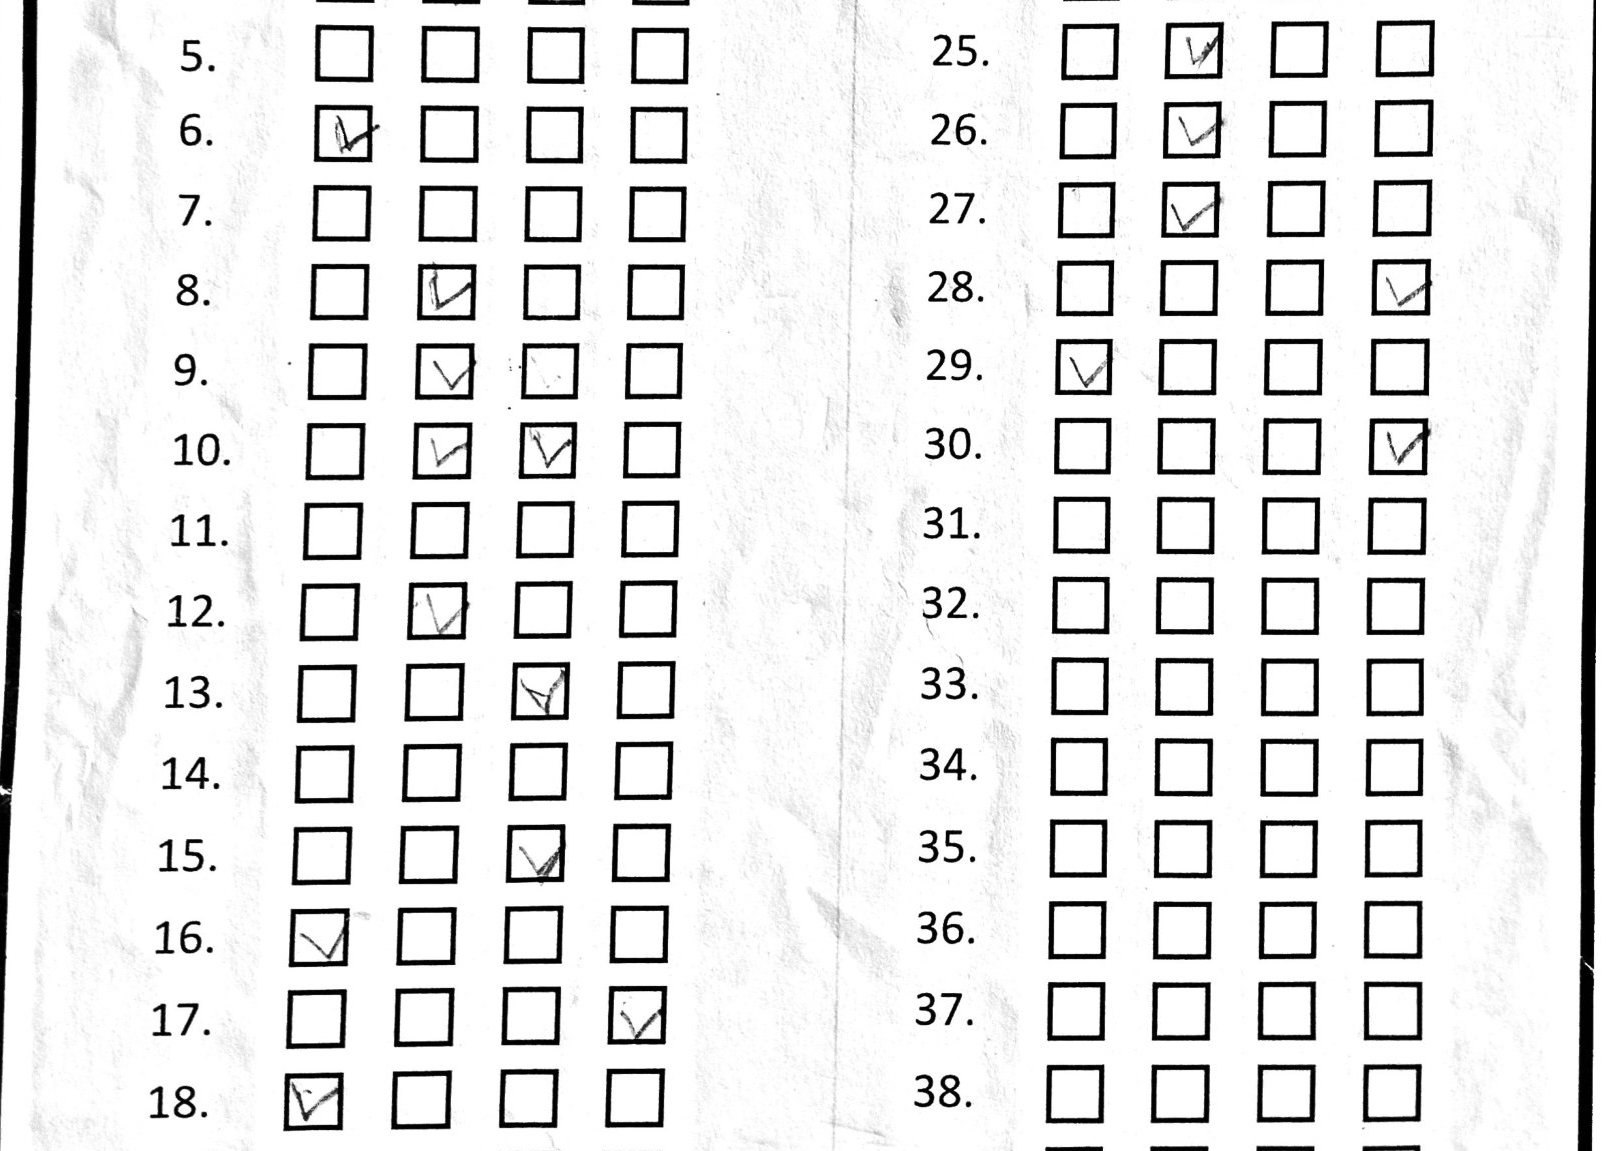

Thresh


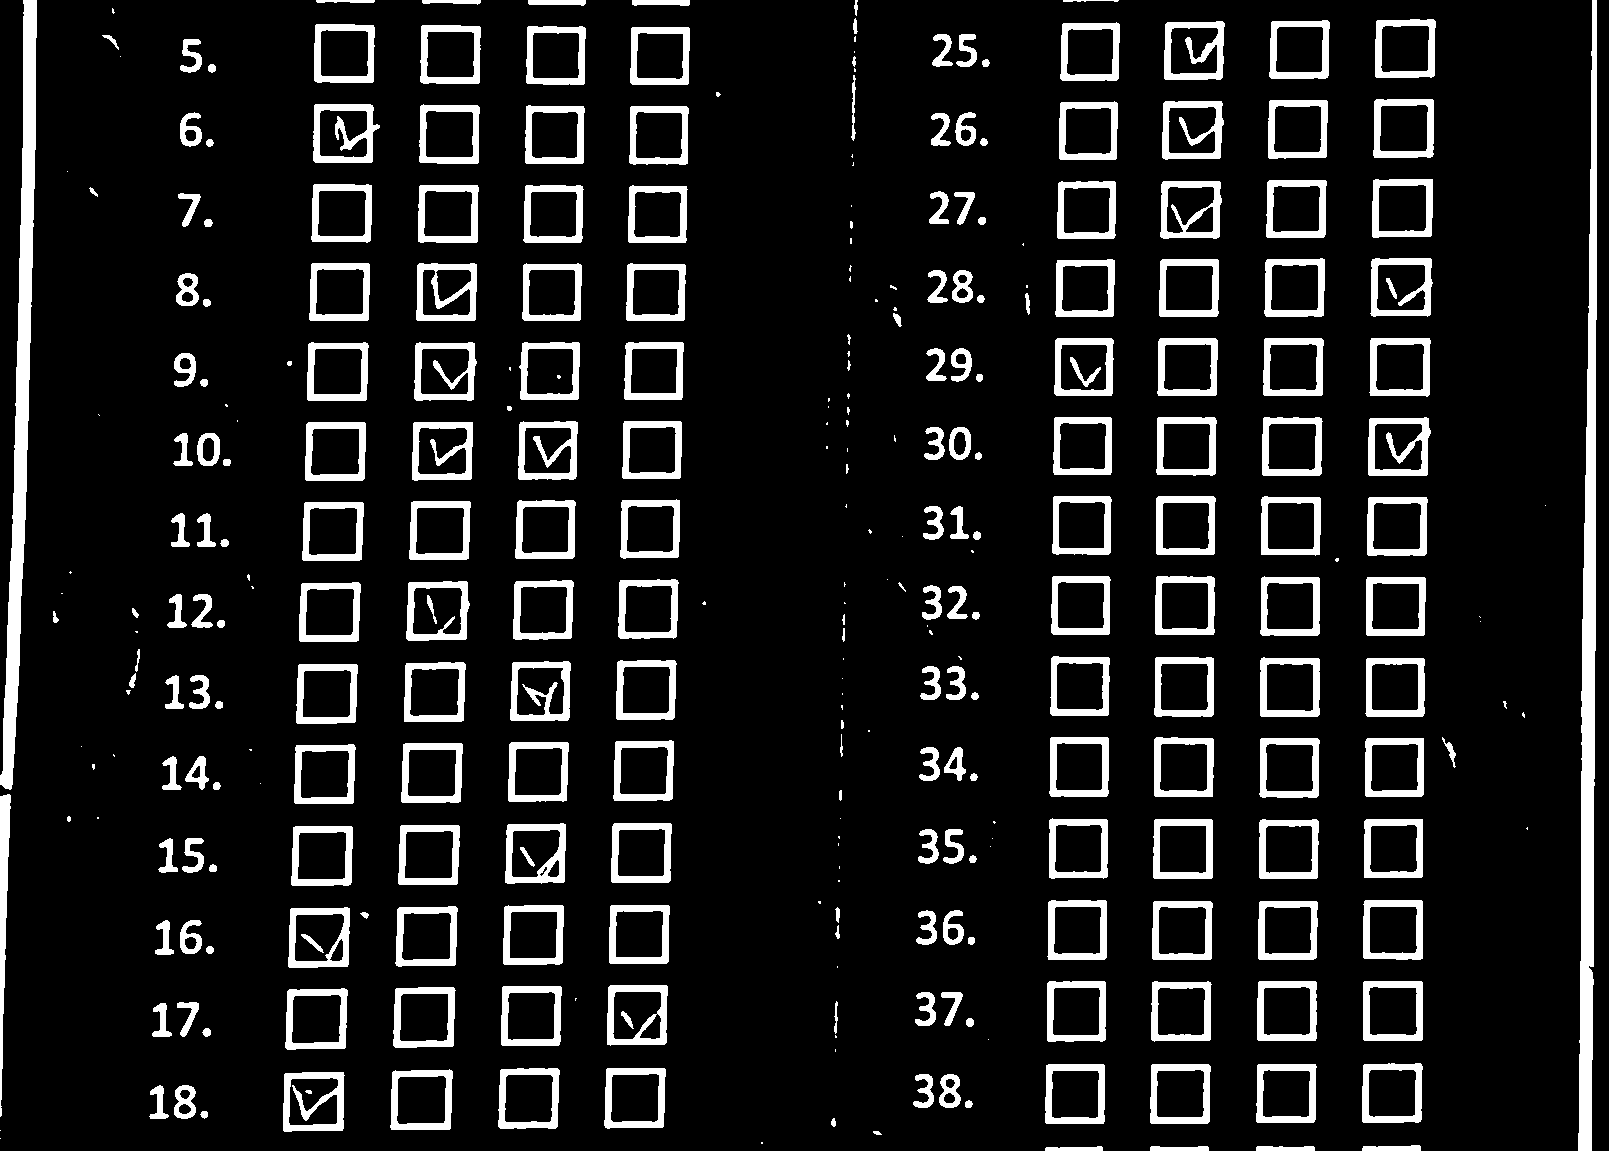

In [160]:
# Load the image and convert to grayscale
img = cv2.imread(image_path)
cv2_imshow(img)

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur with a kernel size of 5x5
denoised_img = cv2.GaussianBlur(gray, (7, 7), 0)

# Apply thresholding to isolate potential checkbox regions
thresh = cv2.adaptiveThreshold(denoised_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 25, 20)
print("Thresh")
cv2_imshow(thresh)

### Find Contours of the detected lines

In [161]:
 # Find contours, filter for boxes, and group by row
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Detect only boxes, and plot contours

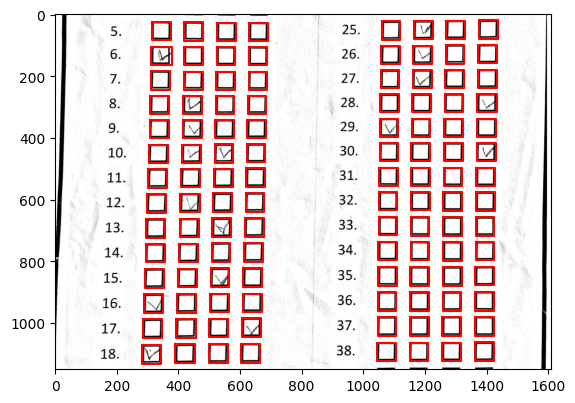

In [194]:
# Convert the image to RGB format for plotting
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create a figure and axes object
fig, ax = plt.subplots()

# Plot the image
ax.imshow(rgb_img)

boxes = []
# Plot the contours
for box in contours:
  x, y, w, h = cv2.boundingRect(box)
  box_aspect_ratio = float(max(w, h)) / min(w, h)
  contour_area = cv2.contourArea(box)

  if contour_area > 700 and box_aspect_ratio < 2:
    ax.plot([x, x + w, x + w, x, x], [y, y, y + h, y + h, y], 'r')
    boxes.append(box)

# Show the plot
plt.show()


Group boxes by rows of 4

In [220]:
boxes_per_row = []
current_row = []
num_boxes_per_row = 4  # Adjust if the actual number of boxes per row is different

for i, box in enumerate(boxes):
    # Get the y-coordinate of the box's top-left corner (assuming horizontal alignment)
    _, y, _, _ = cv2.boundingRect(box)

    # Add the box to the current row
    current_row.append(box)

    # If we've reached a row-end or the last box:
    if (i + 1) % num_boxes_per_row == 0 or i == len(boxes) - 1:
        boxes_per_row.append(current_row)
        current_row = []  # Start a new row

In [232]:
# for each element in boxes_per_row, sort the list of contours by upper left coordinates

sorted_boxes_per_row = []
for row in boxes_per_row:
  sorted_row = sorted(row, key=lambda x: cv2.boundingRect(x)[0])
  sorted_boxes_per_row.append(sorted_row)

boxes_per_row = sorted_boxes_per_row

## Detect presence of a mark in each cropped box

In [234]:
def is_checkbox_marked(cropped_image):

  # Calculate the number of non-zero pixels in the image
  non_zero_pixels = np.count_nonzero(cropped_image)

  # Determine if the checkbox is marked based on the number of non-zero pixels
  if non_zero_pixels > 1500:
    return True
  else:
    return False

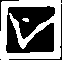

Is marked: True


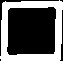

Is marked: False


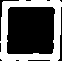

Is marked: False


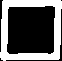

Is marked: False


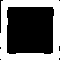

Is marked: False


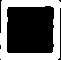

Is marked: False


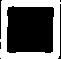

Is marked: False


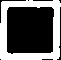

Is marked: False


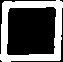

Is marked: False


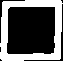

Is marked: False


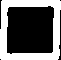

Is marked: False


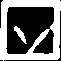

Is marked: True


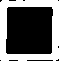

Is marked: False


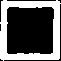

Is marked: False


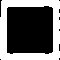

Is marked: False


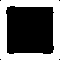

Is marked: False


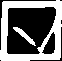

Is marked: True


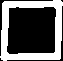

Is marked: False


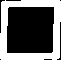

Is marked: False


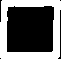

Is marked: False


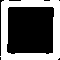

Is marked: False


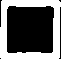

Is marked: False


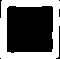

Is marked: False


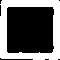

Is marked: False


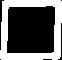

Is marked: False


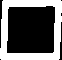

Is marked: False


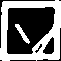

Is marked: True


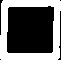

Is marked: False


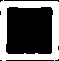

Is marked: False


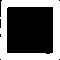

Is marked: False


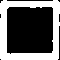

Is marked: False


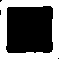

Is marked: False


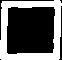

Is marked: False


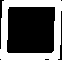

Is marked: False


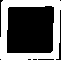

Is marked: False


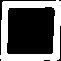

Is marked: False


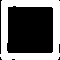

Is marked: False


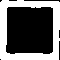

Is marked: False


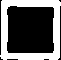

Is marked: False


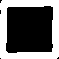

Is marked: False


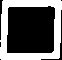

Is marked: False


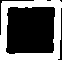

Is marked: False


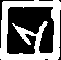

Is marked: True


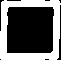

Is marked: False


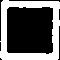

Is marked: False


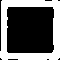

Is marked: False


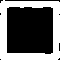

Is marked: False


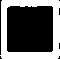

Is marked: False


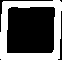

Is marked: False


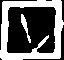

Is marked: True


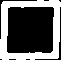

Is marked: False


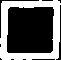

Is marked: False


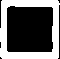

Is marked: False


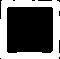

Is marked: False


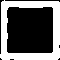

Is marked: False


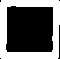

Is marked: False


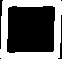

Is marked: False


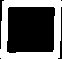

Is marked: False


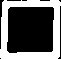

Is marked: False


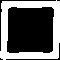

Is marked: False


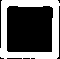

Is marked: False


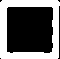

Is marked: False


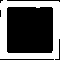

Is marked: False


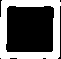

Is marked: False


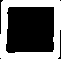

Is marked: False


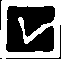

Is marked: True


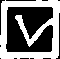

Is marked: True


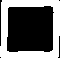

Is marked: False


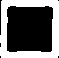

Is marked: False


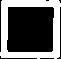

Is marked: False


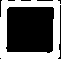

Is marked: False


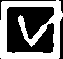

Is marked: True


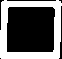

Is marked: False


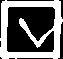

Is marked: True


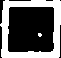

Is marked: False


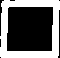

Is marked: False


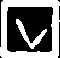

Is marked: True


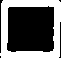

Is marked: False


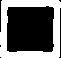

Is marked: False


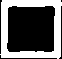

Is marked: False


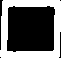

Is marked: False


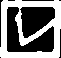

Is marked: True


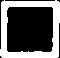

Is marked: False


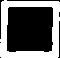

Is marked: False


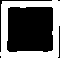

Is marked: False


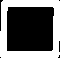

Is marked: False


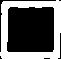

Is marked: False


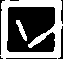

Is marked: True


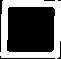

Is marked: False


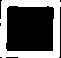

Is marked: False


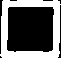

Is marked: False


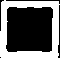

Is marked: False


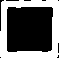

Is marked: False


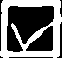

Is marked: True


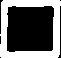

Is marked: False


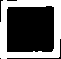

Is marked: False


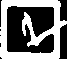

Is marked: True


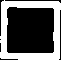

Is marked: False


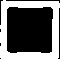

Is marked: False


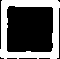

Is marked: False


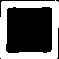

Is marked: False


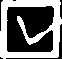

Is marked: True


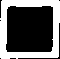

Is marked: False


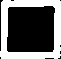

Is marked: False


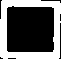

Is marked: False


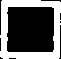

Is marked: False


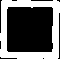

Is marked: False


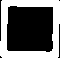

Is marked: False


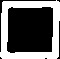

Is marked: False


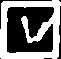

Is marked: True


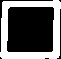

Is marked: False


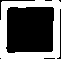

Is marked: False


In [246]:
boxes_marked = []
for row_stack in boxes_per_row:
  marked_sublist = []
  for box in row_stack:
    # Get bounding rectangle of the contour
    x, y, w, h = cv2.boundingRect(box)

    # Create a mask
    mask = np.zeros_like(thresh)
    cv2.drawContours(mask, [box], 0, 255, -1)  # Draw filled contour in white on black background

    # Extract the region of interest using the mask
    cropped_image = cv2.bitwise_and(thresh, mask)[y:y+h, x:x+w]
    cv2_imshow(cropped_image)

    # Check if the cropped image is marked
    is_marked = is_checkbox_marked(cropped_image)
    marked_sublist.append(is_marked)
    print("Is marked:", is_marked)
  boxes_marked.append(marked_sublist)

In [245]:
# Get positions of marked boxes

marked_positions = []
for i, row in enumerate(boxes_marked):
  true_positions = []
  for i, element in enumerate(row):
    if element:
      true_positions.append(i+1)
  marked_positions.append(true_positions)

In [237]:
results = {}
for i in range(0, len(marked_positions)-1):
  left = 18-i # 18 is the last question of the left column
  right = 38-i # 38 is the last question of the right column
  results[left] = marked_positions[i]
  results[right] = marked_positions[i + 1]

  if left==5 and right==25: # 5 and 25 are the first questions of the left and right columns
    break

## Final Responses

In [243]:
# sort results by keys

sorted_results = dict(sorted(results.items()))

for k,v in sorted_results.items():
  print("Question:",k)
  print("Response:",v)
  print()

Question: 5
Response: []

Question: 6
Response: [2]

Question: 7
Response: []

Question: 8
Response: [3]

Question: 9
Response: []

Question: 10
Response: []

Question: 11
Response: []

Question: 12
Response: [3]

Question: 13
Response: []

Question: 14
Response: [1]

Question: 15
Response: []

Question: 16
Response: [4]

Question: 17
Response: []

Question: 18
Response: [1]

Question: 25
Response: []

Question: 26
Response: []

Question: 27
Response: [2]

Question: 28
Response: []

Question: 29
Response: [3]

Question: 30
Response: []

Question: 31
Response: []

Question: 32
Response: []

Question: 33
Response: [3]

Question: 34
Response: []

Question: 35
Response: [1]

Question: 36
Response: []

Question: 37
Response: [4]

Question: 38
Response: []

